# Lumber Prices

* **Data:** `lumber-prices.csv`
* **Description:** Chicago lumber futures per 1000 board feet, in USD. To keep things simple, we're going to say that this is the measurement over a month instead of just one date per month. Basically: each month, how much you'd pay if you bought 125 2x4 boards at the hardware store.
* **Source:** https://tradingeconomics.com/commodity/lumber
* **Columns of interest:**
    * `Open` is the price at the start of the month
    * `High` is the high price over the course of the month
    * `Low` is the low number over the course of the month
    * `Close` is the number at the end of the month

## Read in your data

In [1]:
# %load ../pandas.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('../data/lumber-prices.csv', parse_dates=['date'])
df.head()

,open,high,low,close,date
0,$407.00,$424.70,$377.00,$424.70,1996-12-09
1,$426.00,$450.50,$395.00,$411.40,1997-01-02
2,$408.50,$421.50,$382.10,$383.50,1997-02-03
3,$386.00,$389.70,$355.00,$380.50,1997-03-03
4,$378.00,$417.50,$376.50,$403.10,1997-04-01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   open    300 non-null    object        
 1   high    300 non-null    object        
 2   low     300 non-null    object        
 3   close   300 non-null    object        
 4   date    300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 11.8+ KB


## What is the earliest month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [4]:
df.sort_values(by='date').head(1)

df['date'].min()

,open,high,low,close,date
0,$407.00,$424.70,$377.00,$424.70,1996-12-09


Timestamp('1996-12-09 00:00:00')



## What 3 months had the highest high lumber price?

In [5]:
# df['high']=df['high'].str.replace('$', '').astype(float)
def remove_dollar(df):
    for i in range(len(df.columns[:-1])):
        
        df[df.columns[i]]=df[df.columns[i]].str.replace('$', '')
        df[df.columns[i]]=df[df.columns[i]].astype(float)
        
    return df

df=remove_dollar(df)
df
df.info()

,open,high,low,close,date
0,407.00,424.70,377.00,424.70,1996-12-09
1,426.00,450.50,395.00,411.40,1997-01-02
2,408.50,421.50,382.10,383.50,1997-02-03
3,386.00,389.70,355.00,380.50,1997-03-03
4,378.00,417.50,376.50,403.10,1997-04-01
...,...,...,...,...,...
295,716.00,825.60,490.00,621.20,2021-07-01
296,623.10,650.00,448.00,482.80,2021-08-02
297,482.10,659.70,454.40,627.50,2021-09-01
298,637.10,789.60,588.50,591.60,2021-10-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   open    300 non-null    float64       
 1   high    300 non-null    float64       
 2   low     300 non-null    float64       
 3   close   300 non-null    float64       
 4   date    300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.8 KB


In [6]:
highest_high=df.sort_values(by='high', ascending=False).head(3)

highest_high

mons=highest_high['date'].dt.month_name()
mons=mons.to_list()

,open,high,low,close,date
293,"1,520.60","1,711.20","1,201.00","1,309.50",2021-05-03
292,"1,012.60","1,502.30","1,006.00","1,500.50",2021-04-01
294,"1,315.00","1,380.00",705.00,716.00,2021-06-01


In [7]:
print(f'The 3 months of the highest high lumber price: {mons[0]}, {mons[1]}, {mons[2]}')

The 3 months of the highest high lumber price: May, April, June


## What is the median "high" lumber price in our dataset?

In [8]:
median_value=df['high'].median()
print(f'The median of high lumber is {median_value:}$')

The median of high lumber is 329.65$


## Plot the lowest "low" lumber price on an annual basis.

<AxesSubplot:xlabel='date'>

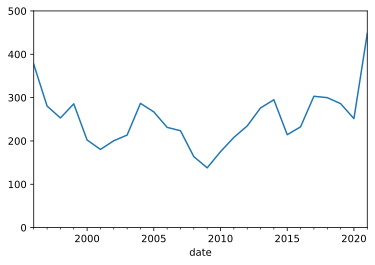

In [9]:
# A = Annual
# M = Monthly
# W = Weekly
# D = Daily
df.resample('A', on='date')['low'].min().plot(ylim=(0, 500))

## What month in our dataset had the largest swing between high and low?

You'll want to create a new column for this one

In [10]:
df.head()

,open,high,low,close,date
0,407.00,424.70,377.00,424.70,1996-12-09
1,426.00,450.50,395.00,411.40,1997-01-02
2,408.50,421.50,382.10,383.50,1997-02-03
3,386.00,389.70,355.00,380.50,1997-03-03
4,378.00,417.50,376.50,403.10,1997-04-01


In [11]:
df['swing']=df['high'] - df['low']
res=df.sort_values(by='swing', ascending=False).head(1)
res

mon=res['date'].dt.month_name()
mon=mon.to_list()
print(f'The largest swing month is {mon[0]}')

,open,high,low,close,date,swing
294,"1,315.00","1,380.00",705.00,716.00,2021-06-01,675.00


The largest swing month is June


## In how many months did lumber prices rise?

If the price was greater at the end of the month than the beginning of the month, we'll say the price rose.

In [12]:
df['diff']=df['close']-df['open']

df.head()

df[df['diff']>0].shape[0]

,open,high,low,close,date,swing,diff
0,407.00,424.70,377.00,424.70,1996-12-09,47.70,17.70
1,426.00,450.50,395.00,411.40,1997-01-02,55.50,-14.60
2,408.50,421.50,382.10,383.50,1997-02-03,39.40,-25.00
3,386.00,389.70,355.00,380.50,1997-03-03,34.70,-5.50
4,378.00,417.50,376.50,403.10,1997-04-01,41.00,25.10


145

In [13]:
len(df[df.close>df.open])

145

## In 2000, how many months saw lumber prices rise vs lumber prices fall?

In [14]:
year_2000=df[df.date.dt.year==2000]

year_2000

,open,high,low,close,date,swing,diff
37,352.00,359.80,323.20,346.60,2000-01-03,36.60,-5.40
38,345.50,360.50,329.50,330.20,2000-02-01,31.00,-15.30
39,335.00,342.80,317.00,324.70,2000-03-01,25.80,-10.30
40,326.00,329.50,292.20,299.50,2000-04-03,37.30,-26.50
41,301.00,303.00,272.60,297.00,2000-05-01,30.40,-4.00
42,295.90,308.30,268.00,275.50,2000-06-01,40.30,-20.40
43,263.00,267.00,235.00,250.00,2000-07-03,32.00,-13.00
44,248.10,249.80,213.20,221.80,2000-08-01,36.60,-26.30
45,222.00,250.30,212.10,230.10,2000-09-01,38.20,8.10
46,231.50,234.00,202.20,207.20,2000-10-02,31.80,-24.30


In [15]:
year_2000[year_2000.close>year_2000.open].shape[0]

year_2000[year_2000.close<year_2000.open].shape[0]

2

10

In [16]:
df['prices_rose']=df.close > df.open

df.head()

,open,high,low,close,date,swing,diff,prices_rose
0,407.00,424.70,377.00,424.70,1996-12-09,47.70,17.70,True
1,426.00,450.50,395.00,411.40,1997-01-02,55.50,-14.60,False
2,408.50,421.50,382.10,383.50,1997-02-03,39.40,-25.00,False
3,386.00,389.70,355.00,380.50,1997-03-03,34.70,-5.50,False
4,378.00,417.50,376.50,403.10,1997-04-01,41.00,25.10,True


In [17]:
df[df.date.dt.year==2000].prices_rose.value_counts()

False    10
True      2
Name: prices_rose, dtype: int64